# 决策树算法

In [9]:
#1.导入需要的算法库和模块
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

In [10]:
#2.探索数据
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data["class"]=iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [11]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [12]:
# 3.分训练集和测试集
x_train , x_test , y_train , y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=10)
x_train

array([[ 5.2,  4.1,  1.5,  0.1],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 6.7,  3.3,  5.7,  2.5],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 7.2,  3.6,  6.1,  2.5],
       [ 5.5,  2.4,  3.7,  1. ],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.3,  3.7,  1.5,  0.2],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 6.4,  3.1,  5.5,  1.8],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 6.7,  3.1,  5.6,  2.4],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 6.9,  3.1,  5.4,  2.1],
       [ 4.8,  3. ,  1.4,  0.3],
       [ 5.8,  2.7,  3.9,  1.2],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 4.4,  3.2,  1.3,  0.2],
       [ 6.8,  3.2,  5.9,  2.3],
       [ 7.9,  3.8,  6.4,  2. ],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 7.6,  3. ,  6.6,  2.1],
       [ 6

In [13]:
#4.对特征值进行标准化处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
print(np.mean(x_train_std))
print(np.var(x_train_std))
x_train_std

-2.79141789049e-16
1.0


array([[-0.78847931,  2.31750529, -1.25597134, -1.40618831],
       [ 1.29661042,  0.04331786,  0.66347116,  0.41343917],
       [ 0.07008705,  0.2707366 ,  0.60701697,  0.80335934],
       [-0.29786996, -0.63893838,  0.66347116,  1.06330613],
       [ 1.05130574,  0.49815534,  1.11510469,  1.71317308],
       [ 0.43804406, -2.00345084,  0.4376544 ,  0.41343917],
       [ 1.66456743,  1.18041158,  1.34092146,  1.71317308],
       [-0.4205223 , -1.54861335, -0.01397913, -0.23642779],
       [ 0.19273939, -0.41151963,  0.4376544 ,  0.41343917],
       [ 0.68334873,  0.2707366 ,  0.4376544 ,  0.41343917],
       [-0.05256529,  2.09008655, -1.42533391, -1.27621492],
       [-0.66582697,  1.40783032, -1.25597134, -1.27621492],
       [ 0.31539172, -0.41151963,  0.55056278,  0.28346578],
       [-0.54317463,  0.72557409, -1.14306296, -1.27621492],
       [ 0.68334873,  0.04331786,  1.00219631,  0.80335934],
       [-1.40174099,  0.2707366 , -1.19951715, -1.27621492],
       [-1.52439333,  0.

In [14]:
#5.建立模型
clf = tree.DecisionTreeClassifier(criterion="gini",random_state=10,max_depth=4)
clf = clf.fit(x_train_std,y_train)
score_test = clf.score(x_test_std,y_test)
score_train = clf.score(x_train_std,y_train)
score_train,score_test
#可以看出，模型对训练集的拟合效果好，准确率为100％，本可以认为该模型过拟合，但是由于该数据集比较少，特征值少
#且模型对测试集的预测准确率为0.977777，说明该决策树模型节点的不纯度比较低，后续我们将通过网格搜索获取最优参数

(1.0, 0.97777777777777775)

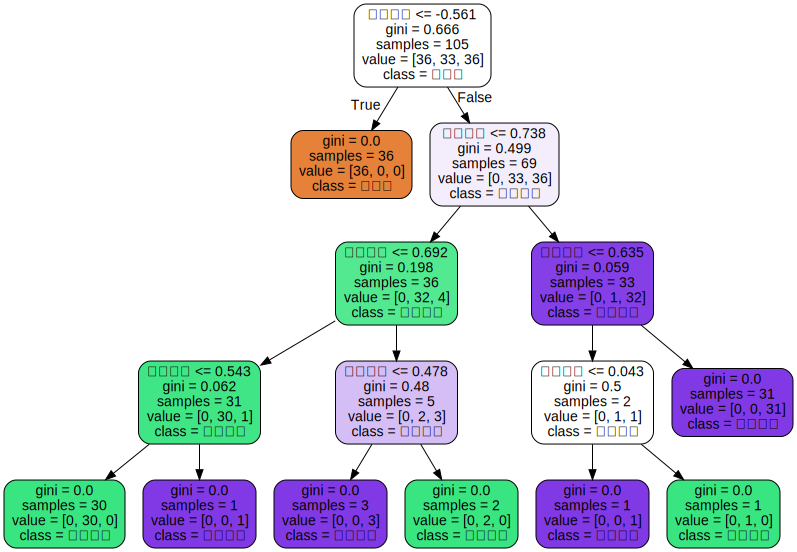

In [15]:
#6.画出决策树
import graphviz
feature_names=["花萼长度","花萼宽度","花瓣长度","花瓣宽度"]  #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names=["山鸢尾","虹膜锦葵","变色鸢尾"]   #山鸢尾/0/setosa，虹膜锦葵/1/versicolor，变色鸢尾/2/virginica
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled=True
                                ,rounded=True
                                ,out_file=None
                               )
graph = graphviz.Source(dot_data)
graph

In [16]:
#7.探索决策树
[*zip(feature_names,clf.feature_importances_)]
#通过该属性我们可以看出每个特征对于我们构建决策树的重要性的大小

[('花萼长度', 0.0),
 ('花萼宽度', 0.014297385620915034),
 ('花瓣长度', 0.053115090393711525),
 ('花瓣宽度', 0.93258752398537348)]

1.对于上述决策树（非参数有监督），其实我们涉及的剪枝参数比较多，比如不纯度的指标，基尼系数和信息熵，以及最大深度，节点分支后每个节点最少包含的训练样本（min_samples_leaf）等，但是我们本质上都是选取不纯度指标最优来进行决策树的分支，但是最优的节点不一定能够保证最优的树，既然一棵树不能保证最优，那就建更多的不同的树，然后从中取最好的。在每次分枝时，不从使用全部特征，而是随机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点，于是我们可以进行网格搜索选取最佳的参数
2.对于剪枝，当预测到我们的模型会出现过拟合时，我们可以通过剪枝参数来防止过拟合，比如通过设置最大深度，min_samples_split（一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生）等，剪枝可以使得模型有更好的泛化性。

# Cross validation

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=clf,
               X=iris.data,
               y=iris.target,
               cv=10)
print('10折交叉验证后的得分：',scores)
print('10折交叉验证平均得分为：',scores.mean())
#可以看出，模型的平均得分为0.96，说明模型拟合效果较好

10折交叉验证后的得分： [ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]
10折交叉验证平均得分为： 0.96


# GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
max_depth=list(range(2,10))
criterion=["entropy","gini"]
splitter=["random","best"]
min_samples_leaf=list(range(1,10))
param_grid = {
                'max_depth':max_depth,
                'criterion':criterion,
                'min_samples_leaf':min_samples_leaf,
                'splitter':splitter
                }
clf_cv = GridSearchCV(estimator = tree.DecisionTreeClassifier(random_state=10),
                     param_grid = param_grid,
                     cv = 5,
                     scoring = 'accuracy')
clf_cv = clf_cv.fit(x_train_std, y_train)
print(clf_cv)
print(clf_cv.best_params_)
print(clf_cv.best_score_)
#通过网格搜索,我们可以看到,对于该决策树模型,最优的参数为{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}
#这与我们前面建造决策树时的参数相符，说明前面的参数为决策树不纯度指标最优所生成的树。

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'splitter': ['random', 'best']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}
0.942857142857


# Nested cross-validation 

In [28]:
from sklearn.model_selection import GridSearchCV,cross_val_score
gs = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=10),
    param_grid = param_grid,
    scoring='accuracy',
    cv=5
)
scores = cross_val_score(gs,x_train_std, y_train, scoring='accuracy', cv=5)
print(scores,np.mean(scores),np.var(scores))

[ 0.86956522  0.9047619   0.95238095  0.85        0.95      ] 0.905341614907 0.00171001033053


# 决策树分类

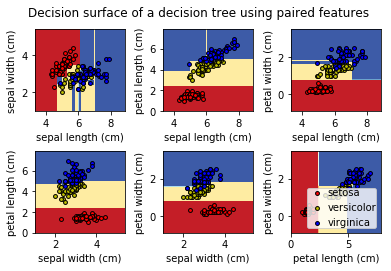

In [45]:
# 代码来源  https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
# 以下代码参考于sklearn官网的决策树分类，其中添加了自己的一些注释和理解


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    #我们只取两个相应的特征
    X = iris.data[:, pair]
    y = iris.target
    # 需要用到的参数
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02
    # 训练
    clf = tree.DecisionTreeClassifier().fit(X, y)
    # 绘制决策边界
    plt.subplot(2, 3, pairidx + 1)
    #找出数据集中两个特征的最大值和最小值，让最大值+1，最小值-1，创造一个比两个特征的区间本身更大一点的区间
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    

#1.绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
#2.分类树的接口predict,返回的是一个大小为n的一维数组，一维数组中的第i个值为模型预测第i个预测样本的标签
#3.ravel()能够将一个多维数组转换成一维数组
#4.np.c_是能够将两个数组组合起来的函数
#5.在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策树模型，再切片
 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

#1.用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
#2.函数np.arange在给定的两个数之间返回均匀间隔的值，plot_step为步长
#3.函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
#4.如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组
  #是以narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
#5.生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的


    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     将返回的样本标签作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure()
plt.show()

# learning_curve

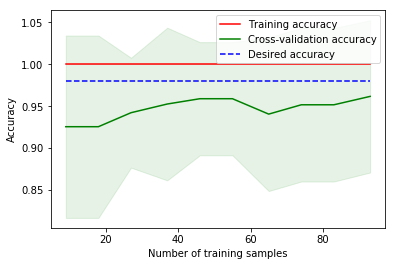

In [32]:
""" 对于不同大小的训练集，确定交叉验证训练和测试的分数。一个交叉验证发生器将整个数据集分割k次，分割成训练集和测试集。
    不同大小的训练集的子集将会被用来训练评估器并且对于每一个大小的训练子集都会产生一个分数，然后测试集的分数也会计算。
    然后，对于每一个训练子集，运行k次之后的所有这些分数将会被平均
"""
from sklearn.model_selection import learning_curve

x_train , x_test , y_train , y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=66)
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
#获取学习曲线
train_sizes=np.linspace(0.1,1.0,10,endpoint=True,dtype='float')
train_sizes, train_scores, test_scores = learning_curve(estimator=clf
                                                        ,X=x_train
                                                        ,y=y_train
                                                        ,cv=10
                                                        ,scoring="accuracy"
                                                        ,train_sizes=train_sizes
                                                       )
#获取 10 折交叉上的预测得分上的均值和方差 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# 绘图
plt.plot(train_sizes, train_scores_mean,  color="r",label="Training accuracy")    
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,                     
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,                     
                 color="r"
                )    
plt.plot(train_sizes, test_scores_mean, color="g",label="Cross-validation accuracy")
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,                     
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, 
                 color="g"
                )
plt.plot(train_sizes,[0.98]*10,color='b',linestyle='--',label='Desired accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# ROC_curve

In [77]:
#代码参考来源：https://blog.csdn.net/u011047955/article/details/87259052

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import  datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [81]:
# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 将标签二值化
y = label_binarize(y, classes=[0, 1, 2])
# 设置种类
n_classes = y.shape[1]
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
#计算y_score,predict_proba返回的是预测属于某标签的概率 
classifier = OneVsRestClassifier(tree.DecisionTreeClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# 计算多分类情况下微观的平均ROC值
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# 计算多分类情况下宏观的平均ROC值
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

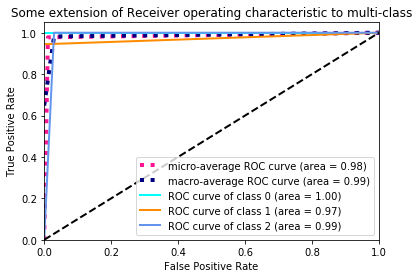

In [83]:
# 绘制所有的ROC曲线

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# validation_curve

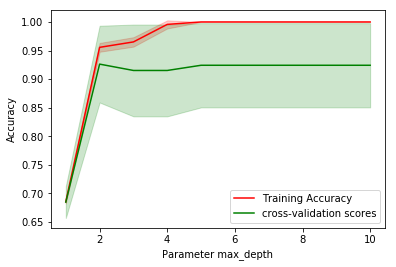

In [27]:
from sklearn.model_selection import validation_curve
param_name="max_depth"
param_range = list(range(1,11))
train_scores, test_scores = validation_curve(estimator=clf,
                     X=x_train,
                     y=y_train,
                     param_name=param_name,
                     param_range=param_range,
                     cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="cross-validation scores", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#1)max_depth很小时，训练分数和验证分数都很低，为欠拟合。
#2)max_depth 逐渐增加，两个分数都较高，此时模型相对不错。
#3)由于数据样本量较小，所以在最大深度增加后对模型并没有多大影响
#4)可以看出，在max_depth=5为参数的最佳选择